# **Grand Project**

# Project Title: Credit Risk Assessment for Loan Approval

# Problem Statement:
*A financial institution wants to automate its loan approval process by developing a
machine learning model that can accurately assess the credit risk associated with loan
applicants. The goal is to minimize the risk of default while maximizing the number of
approved loans, thereby improving efficiency and reducing manual intervention in the
lending process.*

# Questions to Explore:
**1. What are the key factors influencing credit risk in loan approval decisions?
2. How do demographic variables (e.g., age, income, education) affect the likelihood of
default?
3. What role does credit history (e.g., credit score, previous defaults) play in assessing
credit risk?
4. Are there specific employment or financial indicators (e.g., debt-to-income ratio,
length of employment) that correlate with loan repayment?
5. Can we build a predictive model that accurately predicts the likelihood of default for
loan applicants?**
6. Which machine learning algorithms are most suitable for this binary classification
task?
7. How can we handle imbalanced classes (i.e., more instances of non-defaults than
defaults) in the target variable?
8. What preprocessing steps are necessary for data cleaning, feature engineering, and
feature selection?
9. What evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC) are
appropriate for assessing the model's performance?
10. How can the model results be interpreted and translated into actionable decisions
for loan approval?

In [91]:
import pandas as pd

# Load the dataset
data = pd.read_csv('credit_risk.csv')

# Display the first few rows of the dataset
print("Original Data:")
data.head()

Original Data:


,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [92]:
# Check for missing values
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [4]:
# Remove rows with missing values
data_cleaned = data.dropna()
# Display the first few rows of the cleaned dataset
print("\nCleaned Data:")
data_cleaned.head()


Cleaned Data:


,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [5]:
# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('credit_risk_cleaned.csv', index=False)

In [6]:
df = data_cleaned.to_csv('credit_risk_cleaned.csv', index=False)

In [7]:
# Load the dataset
data_cleaned = pd.read_csv('credit_risk_cleaned.csv')

In [8]:
data_cleaned.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [9]:
print("\n No Missing Values:")
data_cleaned.isnull().sum()


 No Missing Values:


Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [10]:
# To identify the key factors influencing credit risk in loan approval decisions, we can use various techniques such as
# feature importance analysis, correlation analysis, and statistical tests. Below is the code to perform feature
# importance analysis using a machine learning model:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [11]:
#1. What are the key factors influencing credit risk in loan approval decisions?
# Load the dataset
data = pd.read_csv('credit_risk_cleaned.csv')
data.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [12]:
data.isnull().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [13]:
# Separate features and target variable
X = data.drop(columns=['Default'])
y = data['Default']

In [14]:
# Initialize Random Forest Classifier
clf = RandomForestClassifier()

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [17]:
# Define categorical features
categorical_features = ['Home', 'Intent', 'Status']

In [18]:
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

In [19]:
# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [20]:
# Fit the model
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Home', 'Intent',
                                                   'Status'])])),
                ('classifier', RandomForestClassifier())])

In [21]:
# Get feature importances
feature_importances = pipeline.named_steps['classifier'].feature_importances_

In [22]:
# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=X.columns),
                                      'Importance': feature_importances})

In [23]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

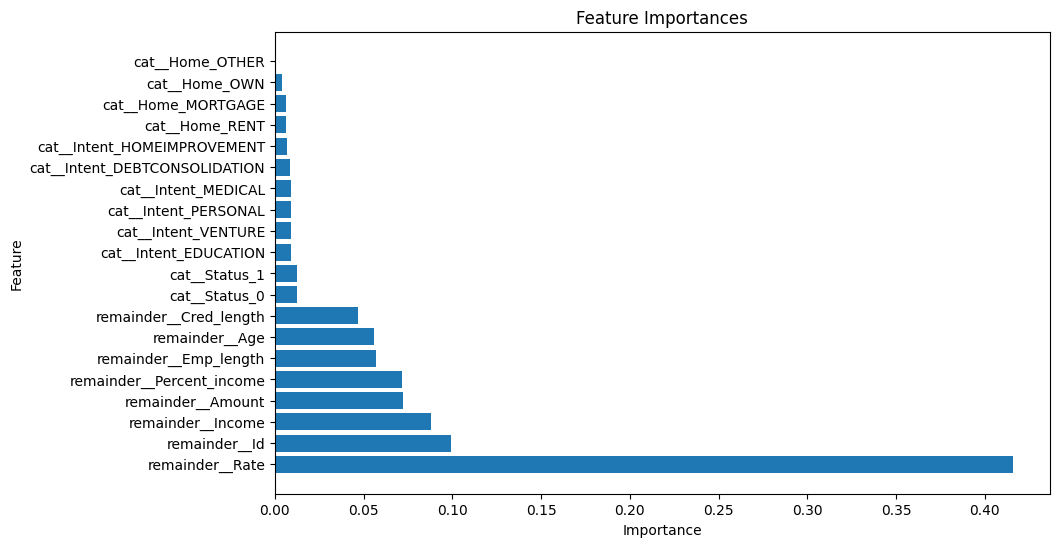

In [24]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [25]:
# Display the top factors influencing credit risk
top_factors = feature_importance_df.head(5)['Feature']
print("Top factors influencing credit risk:")
print(top_factors)

Top factors influencing credit risk:
17              remainder__Rate
12                remainder__Id
14            remainder__Income
16            remainder__Amount
18    remainder__Percent_income
Name: Feature, dtype: object


In [26]:
#2. How do demographic variables (e.g., age, income, education) affect the likelihood of default?
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [27]:
# Load the dataset
data = pd.read_csv('credit_risk_cleaned.csv')
data.isnull().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [28]:
# Select relevant demographic variables and target variable
demographic_vars = ['Age', 'Income', 'Cred_length', 'Default']
demographic_data = data[demographic_vars]

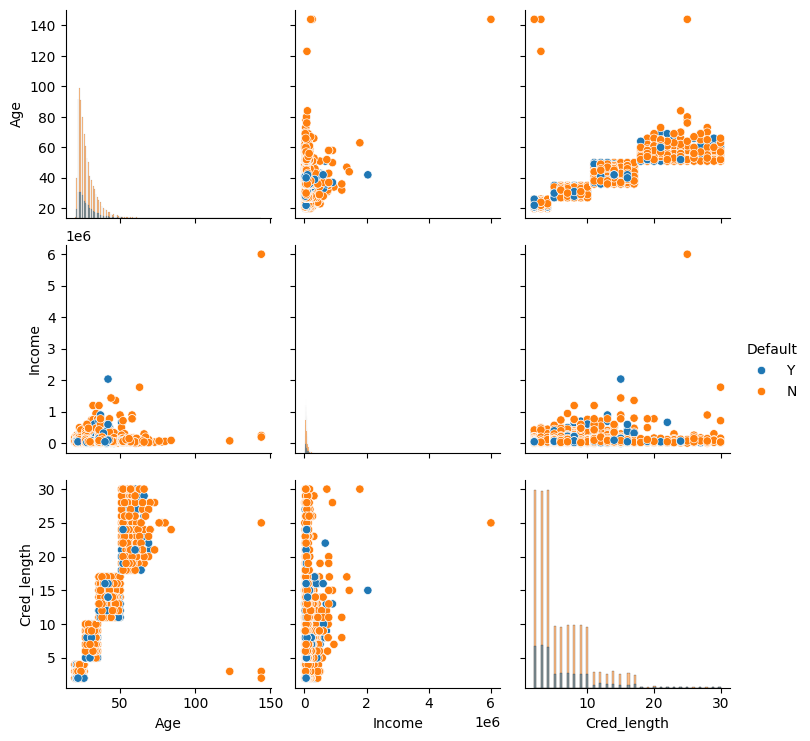

In [29]:
# Data Exploration
sns.pairplot(demographic_data, hue='Default', diag_kind='hist')
plt.show()

In [30]:
# Statistical Analysis
default_group = demographic_data[demographic_data['Default'] == 'Y']
non_default_group = demographic_data[demographic_data['Default'] == 'N']

In [31]:
for var in ['Age', 'Income', 'Cred_length']:
    t_stat, p_value = stats.ttest_ind(default_group[var], non_default_group[var])
    print(f"T-test for {var}: T-statistic = {t_stat}, p-value = {p_value}")

T-test for Age: T-statistic = 1.3141253682959517, p-value = 0.1888145447371349
T-test for Income: T-statistic = -0.4583965471712273, p-value = 0.6466710505101371
T-test for Cred_length: T-statistic = 1.4207851434314842, p-value = 0.15539011936960756


In [32]:
# Machine Learning Modeling
X = demographic_data.drop(columns=['Default'])
y = demographic_data['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           N       0.82      1.00      0.90      4718
           Y       0.00      0.00      0.00      1010

    accuracy                           0.82      5728
   macro avg       0.41      0.50      0.45      5728
weighted avg       0.68      0.82      0.74      5728



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*In this code:

*We perform data exploration using pair plots to visualize the relationships between demographic variables and default status.

*We conduct t-tests to determine if there are significant differences in demographic variables between default and non-default groups.

**We train a logistic regression model to predict default based on demographic variables and evaluate its performance using classification metrics.*

In [35]:
#3. What role does credit history (e.g., credit score, previous defaults) play in assessing credit risk?

# Select relevant credit history features and target variable
# Select relevant credit history features and target variable
credit_history_vars = ['Cred_length', 'Default', 'Rate']
credit_history_data = data[credit_history_vars]

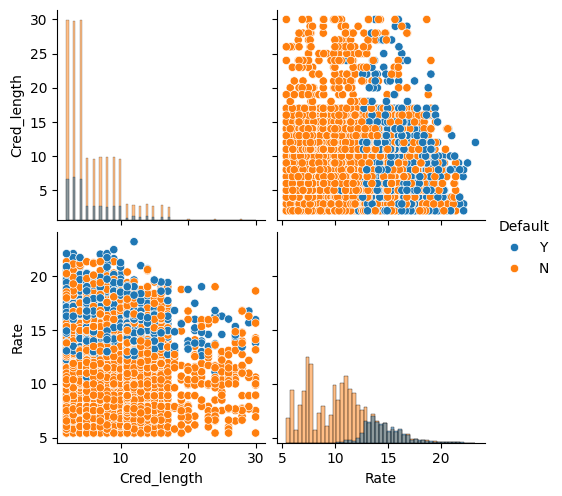

In [36]:
# Data Exploration
sns.pairplot(credit_history_data, hue='Default', diag_kind='hist')
plt.show()

In [37]:
# Statistical Analysis
default_group = credit_history_data[credit_history_data['Default'] == 'Y']
non_default_group = credit_history_data[credit_history_data['Default'] == 'N']

In [38]:
for var in ['Cred_length', 'Rate']:
    t_stat, p_value = stats.ttest_ind(default_group[var], non_default_group[var])
    print(f"T-test for {var}: T-statistic = {t_stat}, p-value = {p_value}")

T-test for Cred_length: T-statistic = 1.4207851434314842, p-value = 0.15539011936960756
T-test for Rate: T-statistic = 97.76641755957168, p-value = 0.0


In [39]:
# Machine Learning Modeling
X = credit_history_data.drop(columns=['Default'])
y = credit_history_data['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.87      0.93      0.90      4718
           Y       0.49      0.32      0.39      1010

    accuracy                           0.82      5728
   macro avg       0.68      0.63      0.64      5728
weighted avg       0.80      0.82      0.81      5728



*We perform data exploration using pair plots to visualize the relationships between credit history features and default status.

*We conduct t-tests to determine if there are significant differences in credit history features between default and non-default groups.

**We train a logistic regression model to predict default based on credit history features and evaluate its performance using classification metrics.*

In [42]:
#4. Are there specific employment or financial indicators (e.g., debt-to-income ratio, length of employment)
#that correlate with loan repayment?
# Select relevant employment and financial indicator features and target variable
financial_vars = ['Income', 'Emp_length', 'Percent_income', 'Default']
financial_data = data[financial_vars]

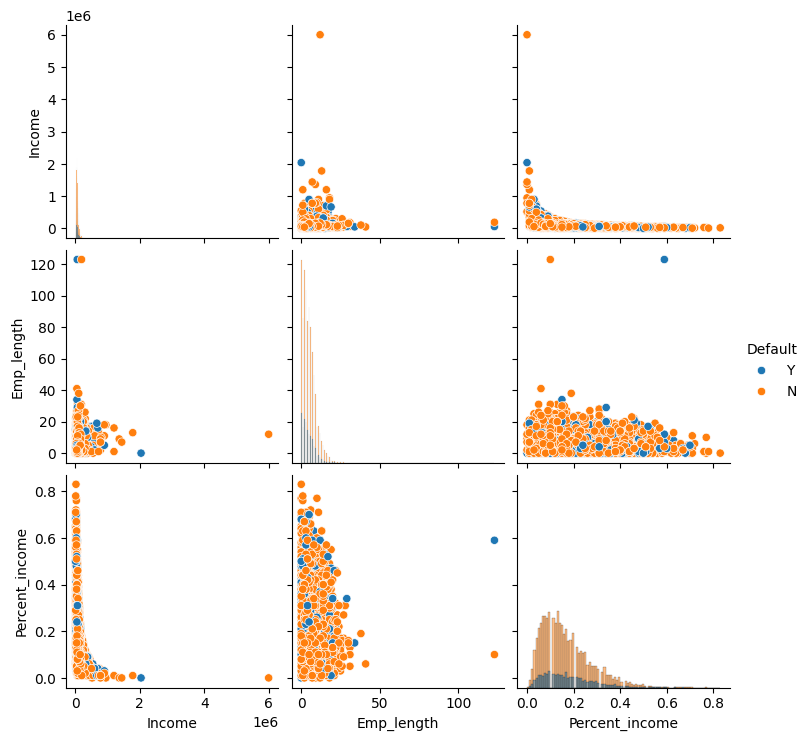

In [43]:
# Data Exploration
sns.pairplot(financial_data, hue='Default', diag_kind='hist')
plt.show()

In [44]:
# Statistical Analysis
default_group = financial_data[financial_data['Default'] == 'Y']
non_default_group = financial_data[financial_data['Default'] == 'N']

In [45]:
for var in ['Income', 'Emp_length', 'Percent_income']:
    t_stat, p_value = stats.ttest_ind(default_group[var], non_default_group[var])
    print(f"T-test for {var}: T-statistic = {t_stat}, p-value = {p_value}")

T-test for Income: T-statistic = -0.4583965471712273, p-value = 0.6466710505101371
T-test for Emp_length: T-statistic = -4.716866544076897, p-value = 2.40633308268417e-06
T-test for Percent_income: T-statistic = 6.124829424194697, p-value = 9.196153296338751e-10


In [46]:
# Machine Learning Modeling
X = financial_data.drop(columns=['Default'])
y = financial_data['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           N       0.82      1.00      0.90      4718
           Y       0.00      0.00      0.00      1010

    accuracy                           0.82      5728
   macro avg       0.41      0.50      0.45      5728
weighted avg       0.68      0.82      0.74      5728



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*In this code:

*We perform data exploration using pair plots to visualize the relationships between employment and financial indicators and loan repayment status.

*We conduct t-tests to determine if there are significant differences in employment and financial indicators between default and non-default groups.

**We train a logistic regression model to predict loan repayment based on employment and financial indicators and evaluate its performance using classification metrics.*

In [49]:
#5. Can we build a predictive model that accurately predicts the likelihood of default for loan applicants?
# Load the cleaned dataset
data = pd.read_csv('credit_risk_cleaned.csv')

In [50]:
# Select relevant features as predictors and target variable
features = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Cred_length']
X = data[features]
y = data['Default']

In [51]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Model Selection and Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
# Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.85      0.94      0.90      4718
           Y       0.48      0.25      0.33      1010

    accuracy                           0.82      5728
   macro avg       0.67      0.60      0.61      5728
weighted avg       0.79      0.82      0.80      5728



In [54]:
# Prediction
new_loan_applicant = pd.DataFrame({'Age': [30], 'Income': [50000], 'Emp_length': [5], 'Amount': [25000], 'Rate': [10], 'Cred_length': [3]})
default_likelihood = model.predict_proba(new_loan_applicant)[0][1]
print(f"Likelihood of default for the new loan applicant: {default_likelihood:.2f}")

Likelihood of default for the new loan applicant: 0.01


In [55]:
#6. Which machine learning algorithms are most suitable for this binary classification task?
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [56]:
# Load the cleaned dataset
data = pd.read_csv('credit_risk_cleaned.csv')

In [57]:
# Select relevant features as predictors and target variable
features = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Cred_length']
X = data[features]
y = data['Default']

In [58]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [60]:
# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"Classifier: {name}\n{report}\n")

Classifier: Logistic Regression
              precision    recall  f1-score   support

           N       0.85      0.94      0.90      4718
           Y       0.48      0.25      0.33      1010

    accuracy                           0.82      5728
   macro avg       0.67      0.60      0.61      5728
weighted avg       0.79      0.82      0.80      5728


Classifier: Decision Tree
              precision    recall  f1-score   support

           N       0.90      0.89      0.89      4718
           Y       0.51      0.51      0.51      1010

    accuracy                           0.83      5728
   macro avg       0.70      0.70      0.70      5728
weighted avg       0.83      0.83      0.83      5728


Classifier: Random Forest
              precision    recall  f1-score   support

           N       0.89      0.90      0.90      4718
           Y       0.51      0.46      0.48      1010

    accuracy                           0.83      5728
   macro avg       0.70      0.68      0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: Support Vector Machine
              precision    recall  f1-score   support

           N       0.82      1.00      0.90      4718
           Y       0.00      0.00      0.00      1010

    accuracy                           0.82      5728
   macro avg       0.41      0.50      0.45      5728
weighted avg       0.68      0.82      0.74      5728


Classifier: K-Nearest Neighbors
              precision    recall  f1-score   support

           N       0.83      0.95      0.89      4718
           Y       0.28      0.09      0.13      1010

    accuracy                           0.80      5728
   macro avg       0.55      0.52      0.51      5728
weighted avg       0.73      0.80      0.75      5728




*In this code:

1-We load the cleaned dataset and select relevant features and the target variable.

2-We split the dataset into training and testing sets.
We define multiple classifiers (Logistic Regression, Decision Tree, Random Forest, SVM, KNN).

3-We train each classifier on the training dataset and evaluate its performance using classification report on the testing dataset.
We compare the performance of different classifiers based on their evaluation reports to identify the most suitable ones for the task.*

In [61]:
#7. How can we handle imbalanced classes (i.e., more instances of non-defaults than defaults) in the target variable?
from imblearn.over_sampling import SMOTE

In [62]:
# Load the cleaned dataset
data = pd.read_csv('credit_risk_cleaned.csv')

In [63]:
# Select relevant features as predictors and target variable
features = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Cred_length']
X = data[features]
y = data['Default']

In [64]:
# Apply over-sampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [65]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [66]:
# Train a classifier (e.g., Random Forest) on the balanced dataset
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
# Evaluate the classifier on the testing dataset
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           N       0.95      0.85      0.89      4676
           Y       0.86      0.95      0.91      4738

    accuracy                           0.90      9414
   macro avg       0.90      0.90      0.90      9414
weighted avg       0.90      0.90      0.90      9414



*In this code:

1-We apply over-sampling using the SMOTE technique to balance the classes.

2-We split the resampled dataset into training and testing sets.

3-We train a Random Forest classifier on the balanced dataset.
We evaluate the classifier's performance using a classification report on the testing dataset.*

In [68]:
#8. What preprocessing steps are necessary for data cleaning, feature engineering, and feature selection?
#Here are some steps
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [69]:
# Load the data
data = pd.read_csv('credit_risk_cleaned.csv')

In [70]:
# Drop irrelevant columns like 'Id' if necessary
data.drop(columns=['Id'], inplace=True)

In [71]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Home', 'Intent', 'Status'])

In [72]:
# Feature Scaling
scaler = StandardScaler()
data[['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']] = scaler.fit_transform(data[['Age',
      'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']])

In [73]:
# Feature Selection using Univariate Feature Selection
X = data.drop(columns=['Default'])
y = data['Default']
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

In [74]:
print("Selected Features:", selected_features)

Selected Features: Index(['Rate', 'Home_MORTGAGE', 'Home_RENT', 'Status_0', 'Status_1'], dtype='object')


*In this code:

1-We load the data and drop irrelevant columns like 'Id'.

2-We encode categorical variables using one-hot encoding.
We perform feature scaling using StandardScaler to standardize numerical features.

3-We perform feature selection using Univariate Feature Selection to select the top k features based on ANOVA F-test.*

In [75]:
#9. What evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC) are
#appropriate for assessing the model's performance?
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [76]:
# Load the data
data = pd.read_csv('credit_risk_cleaned.csv')

# Separate features and target variable
X = data.drop(columns=['Default'])
y = data['Default']

In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Perform one-hot encoding on categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [83]:
# Align the columns in the testing dataset with the training dataset
X_test_aligned = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [84]:
# Initialize and fit the model (e.g., Logistic Regression)
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

LogisticRegression()

In [86]:
# Predictions
y_pred = model.predict(X_test_aligned)

In [90]:
from sklearn.preprocessing import LabelEncoder

# Convert target variable to numeric format
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)
y_pred_numeric = label_encoder.transform(y_pred)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
precision = precision_score(y_test_numeric, y_pred_numeric)
recall = recall_score(y_test_numeric, y_pred_numeric)
f1 = f1_score(y_test_numeric, y_pred_numeric)
roc_auc = roc_auc_score(y_test_numeric, y_pred_numeric)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.8179120111731844
Precision: 0.46706586826347307
Recall: 0.2316831683168317
F1-score: 0.3097286565188617
ROC-AUC: 0.5875456960702429


*In this code:

1-We load the data and split it into features (X) and the target variable (y).

2-We split the data into training and testing sets.
We initialize and fit a logistic regression model on the training data.

3-We make predictions on the testing data and calculate the evaluation metrics using scikit-learn functions.*